In [157]:
import numpy as np
import pandas as pd
from lightcurve_fitting import models, filters, lightcurve
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib

# Generating fake lightcurves

In [208]:
# filters.Filter('FUV', 'b', 8, 'GALEX', filename='GALEX_GALEX.FUV.dat', angstrom=True).freq_eff
filters.filtdict["g"].freq_eff


<Quantity 648.98234254 THz>

In [209]:
lightcurve.LC({"MJD":[2,3,4],
               "mag":[16,17,18],
               "filters":[filters.filtdict["g"],filters.filtdict["g"],filters.filtdict["g"]]})
# dir(lightcurve.LC)/

MJD,mag,filters
int64,int64,object
2,16,g
3,17,g
4,18,g


In [210]:
def load_lc(lc = None, fake=True):
    if fake:
        lc =  lightcurve.LC({"MJD":[2,3,4],
                "mag":[16,17,18],
                "filters":[filters.filtdict["g"],filters.filtdict["g"],filters.filtdict["g"]]})

    lc.meta['dm'] = 31.39
    lc.meta['extinction'] = {
    'U_S': 0.125,

    
    'B_S':0.103,
    'V_S':0.082,
    'U': 0.131,
    'B': 0.109,
    'V': 0.083,
    'R': 0.065,
    'I': 0.045,
    'u': 0.128,
    'g': 0.100,
    'c': 0.085,
    'r': 0.069,
    'o': 0.060,
    'i': 0.051,
    'z': 0.038,
    'UVW2': 0.234,
    'UVM2': 0.211,
    'UVW1': 0.166,
    'DLT40': 0.083,
    }
    # Based on no Na I D detection in spectrum
    lc.meta['hostext'] = {
    'U': 0.,
    'B': 0.,
    'V': 0.,
    'R': 0.,
    'I': 0.,
    'u': 0.,
    'g': 0.,
    'r': 0.,
    'i': 0.,
    'z': 0.,
    'UVW2': 0.,
    'UVM2': 0.,
    'UVW1': 0.,
    'o': 0.,
    'c': 0.,
    'U_S': 0.,
    'B_S': 0.,
    'V_S': 0.,
    'DLT40': 0.,
    }

    z = 0.00526
    lc.meta['redshift'] = z  # redshift
    return lc


In [211]:
importlib.reload(models)
lc_fake = load_lc(fake=True)
model = models.ShockCooling4(lc_fake)


MJD = np.linspace(3, 13, 300)
filters_list = [filters.filtdict["g"],filters.filtdict["uvw1"], filters.filtdict["r"], filters.filtdict["i"], filters.filtdict["z"]]
filter_for_mjd = np.random.choice(filters_list, size=len(MJD), replace=True)

ten13cmtoRsol = 1e13*1.4374e-11
ten8p5cmstoten3kms = 10**.5
units_array = np.array([ten8p5cmstoten3kms, 1, 1, ten13cmtoRsol, 1])
model_inputs = np.array([7.2, 5, 1.6, 410, 2.5])/units_array



In [162]:
model_inputs

array([2.27683992, 5.        , 1.6       , 2.85237234, 2.5       ])

In [213]:

v_s = model_inputs[0]       # Shock velocity
M_env = model_inputs[1]     # Envelope mass
f_rho_M = model_inputs[2]   # Density profile factor
R = model_inputs[3]         # Radius
t_exp = model_inputs[4]     # explosion time
lum = model(MJD, v_s=v_s, M_env=M_env, f_rho_M=f_rho_M, R=R, t_exp=t_exp, f=filter_for_mjd) + np.random.normal(0, 1e19, len(MJD))

In [215]:
lc = load_lc(lc=lightcurve.LC({"MJD":MJD,
                "lum":lum,
                "dlum":np.random.normal(1e19, .5e19, len(lum)),
                "filter":filter_for_mjd}),
                fake=False)
lc

MJD,lum,dlum,filter
float64,float64,float64,object
3.0,5.0713422565210784e+20,7.363564115683504e+18,UVW1
3.0334448160535117,8.853450756321116e+19,9.145387001473018e+18,z
3.0668896321070234,7.978519617387294e+19,1.1462098021587372e+19,z
3.100334448160535,8.192657680818458e+19,2.7500980299588706e+19,z
3.1337792642140467,5.537351397240724e+20,7.420060160419547e+18,UVW1
3.1672240802675584,9.332105872177971e+19,1.5374157688163222e+19,z
3.20066889632107,9.769935635898273e+19,1.6216361815932547e+19,z
3.234113712374582,3.045400072930443e+20,1.4071013627956064e+19,g
3.2675585284280935,1.0464504424955219e+20,1.4726391131386757e+19,z


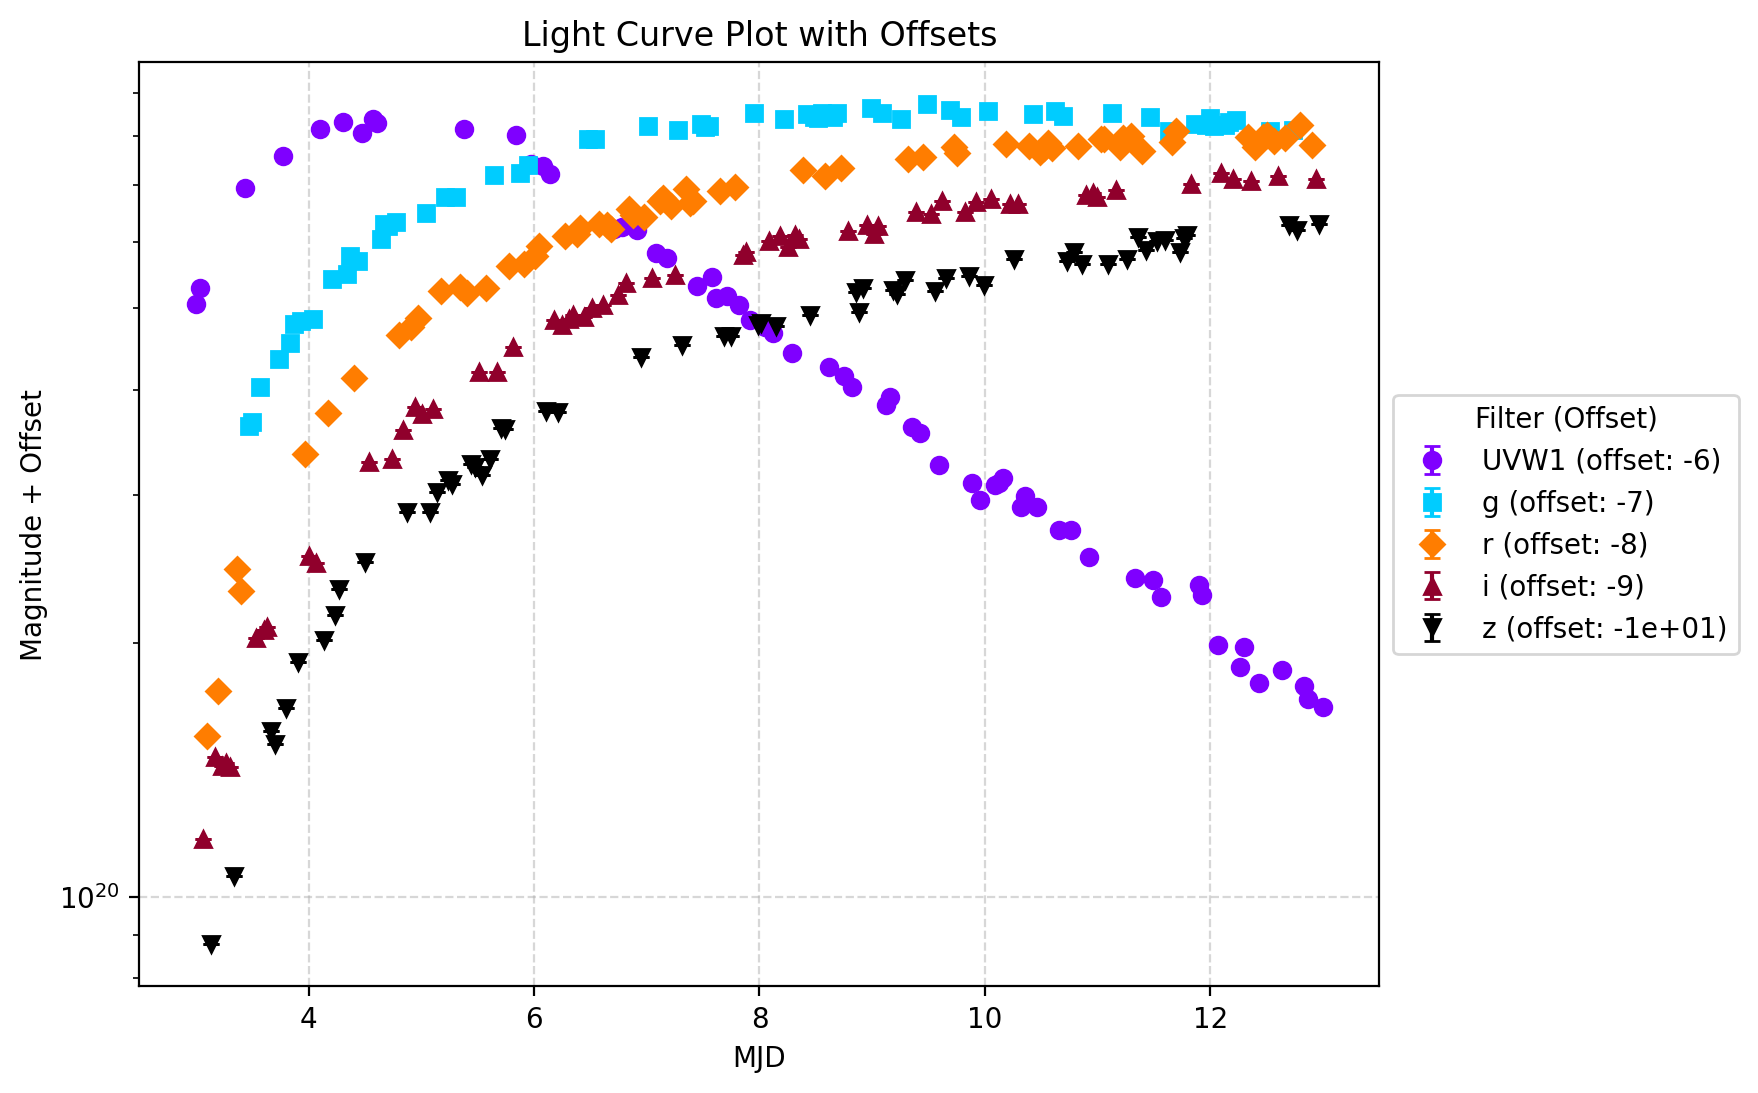

In [166]:
import numpy as np
import matplotlib.pyplot as ax

def light_curve_plot(lc, offset=0.5):
    """
    Plots light curves with different markers, applying an offset for each filter.
    
    Parameters:
    lc : dict or structured array
        A dataset containing 'MJD', 'mag', 'dmag', and 'filter' fields.
    """

    # Unique filters in the dataset
    ufilts = np.unique(lc['filter'])

    # Define marker styles for each filter
    markers = ['o', 's', 'D', '^', 'v', 'P', '*', 'X']
    face_color = []
    
    # Define offsets for each filter (spaced by 0.5 mag)
    offsets = {filt: -10 + i * offset for i, filt in enumerate(ufilts[::-1])}

    fig, ax = plt.subplots(figsize=(8, 6), dpi=200)  # Set figure size

    for i, filt in enumerate(ufilts):
        # Create mask for the current filter
        fmask = np.array(lc['filter'] == filt)
        
        # Extract values and apply offset
        mjd_filt = lc['MJD'][fmask]
        y_filt = lc['lum'][fmask] + offsets[filt]  # Apply offset
        y_filt_err = lc['dlum'][fmask]
        
        # Select marker style based on index
        marker = markers[i % len(markers)]
        
        style = filt.plotstyle

        # Plot with error bars
        ax.errorbar(mjd_filt, y_filt, yerr=y_filt_err,
         fmt=marker, label=f"{filt} (offset: {offsets[filt]:.1g})",
         capsize=3, **style)

    # Aesthetics
    ax.set_xlabel("MJD")
    ax.set_ylabel("Magnitude + Offset")
    # ax.invert_yaxis()  # Invert y-axis for magnitudes
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title("Light Curve Plot with Offsets")
    ax.set_yscale("log")
    # Move the legend to the right of the plot
    ax.legend(title="Filter (Offset)", loc='center left', bbox_to_anchor=(1, 0.5))

        
# light_curve_plot(lc)
light_curve_plot(lc, offset = 1)

# Preparing to PILCA

In [216]:
MJD_TO_MODEL = MJD
LUM_TO_MODEL = np.log10(lc["lum"])
DLUM_TO_MODEL = lc["dlum"]#lc["dlum"]/lc["lum"]/np.log(10)

X_DATA = np.hstack([MJD_TO_MODEL.reshape(-1,1), LUM_TO_MODEL.reshape(-1,1), DLUM_TO_MODEL.reshape(-1,1)])
ufilters = np.unique(lc["filter"])
filters_mask = torch.zeros((len(ufilters),len(lc)), requires_grad=False, dtype=torch.int)
for i in range(len(ufilters)):
    filters_mask[i] = torch.tensor(lc["filter"]==ufilters[i])

In [217]:
X_DATA = torch.tensor(X_DATA, requires_grad=False)

In [173]:
import torch
print(torch.cuda.is_available())
# device = 'gpu:0'
device = 'cpu'


False


In [174]:
torch.tensor([2.2768, 5.0000, 1.6000, 2.8524, 2.5000], dtype=torch.float64)

tensor([2.2768, 5.0000, 1.6000, 2.8524, 2.5000], dtype=torch.float64)

In [175]:
importlib.reload(models)
lc_fake = load_lc(fake=True)
model_original = models.ShockCooling4(lc_fake)

ten13cmtoRsol = 1e13*1.4374e-11

ten8p5cmstoten3kms = 10**.5
units_array = np.array([ten8p5cmstoten3kms, 1, 1, ten13cmtoRsol, 1])
model_inputs = np.array([5.3875e+00, 4.1513e-07, 2.6636e+00, 1.7901e+00, 8.9253e-01])
v_s = model_inputs[0]       # Shock velocity
M_env = model_inputs[1]     # Envelope mass
f_rho_M = model_inputs[2]   # Density profile factor
R = model_inputs[3]         # Radius
t_exp = model_inputs[4]     # explosion time

lum = model_original(MJD[0:], v_s=v_s, M_env=M_env, f_rho_M=f_rho_M, R=R, t_exp=t_exp, f=[filter_for_mjd[0]])
lum_original = lum
lum[:20]

array([[9.61968077e+18, 9.46727479e+18, 9.31838021e+18, 9.17288334e+18,
        9.03067544e+18, 8.89165244e+18, 8.75571466e+18, 8.62276661e+18,
        8.49271673e+18, 8.36547720e+18, 8.24096374e+18, 8.11909544e+18,
        7.99979459e+18, 7.88298648e+18, 7.73275911e+18, 7.57609860e+18,
        7.42358102e+18, 7.27506650e+18, 7.13042106e+18, 6.98951629e+18,
        6.85222908e+18, 6.71844136e+18, 6.58803985e+18, 6.46091580e+18,
        6.33696482e+18, 6.21608661e+18, 6.09818480e+18, 5.98316677e+18,
        5.87094344e+18, 5.76142915e+18, 5.65454146e+18, 5.55020105e+18,
        5.44833151e+18, 5.34885929e+18, 5.25171352e+18, 5.15682591e+18,
        5.06413061e+18, 4.97356416e+18, 4.88506533e+18, 4.79857506e+18,
        4.71403637e+18, 4.63139423e+18, 4.55059553e+18, 4.47158897e+18,
        4.39432501e+18, 4.31875575e+18, 4.24483494e+18, 4.17251784e+18,
        4.10176120e+18, 4.03252319e+18, 3.96476335e+18, 3.89844252e+18,
        3.83352283e+18, 3.76996758e+18, 3.70774128e+18, 3.646809

In [176]:
importlib.reload(tp)
model_inputs_torch = torch.tensor([5.3875e+00, 4.1513e-07, 2.6636e+00, 1.7901e+00, 8.9253e-01], dtype=torch.float64)


v_s = model_inputs_torch[0]       # Shock velocity
M_env = model_inputs_torch[1]     # Envelope mass
f_rho_M = model_inputs_torch[2]   # Density profile factor
R = model_inputs_torch[3]         # Radius
t_exp = model_inputs_torch[4]     # explosion time
model_torch = tp.ShockCooling4(z=lc.meta["redshift"])
lum= model_torch(MJD[:], v_s=v_s, M_env=M_env, f_rho_M=f_rho_M, R=R, t_exp=t_exp, f=filter_for_mjd[0])
lum_torch = lum
lum#[:20]

tensor([9.6197e+18, 9.4673e+18, 9.3184e+18, 9.1729e+18, 9.0307e+18, 8.8917e+18,
        8.7557e+18, 8.6228e+18, 8.4927e+18, 8.3655e+18, 8.2410e+18, 8.1191e+18,
        7.9998e+18, 7.8830e+18, 7.7328e+18, 7.5761e+18, 7.4236e+18, 7.2751e+18,
        7.1304e+18, 6.9895e+18, 6.8522e+18, 6.7184e+18, 6.5880e+18, 6.4609e+18,
        6.3370e+18, 6.2161e+18, 6.0982e+18, 5.9832e+18, 5.8709e+18, 5.7614e+18,
        5.6545e+18, 5.5502e+18, 5.4483e+18, 5.3489e+18, 5.2517e+18, 5.1568e+18,
        5.0641e+18, 4.9736e+18, 4.8851e+18, 4.7986e+18, 4.7140e+18, 4.6314e+18,
        4.5506e+18, 4.4716e+18, 4.3943e+18, 4.3188e+18, 4.2448e+18, 4.1725e+18,
        4.1018e+18, 4.0325e+18, 3.9648e+18, 3.8984e+18, 3.8335e+18, 3.7700e+18,
        3.7077e+18, 3.6468e+18, 3.5871e+18, 3.5287e+18, 3.4715e+18, 3.4154e+18,
        3.3604e+18, 3.3066e+18, 3.2539e+18, 3.2022e+18, 3.1515e+18, 3.1019e+18,
        3.0532e+18, 3.0054e+18, 2.9587e+18, 2.9128e+18, 2.8678e+18, 2.8237e+18,
        2.7804e+18, 2.7379e+18, 2.6963e+

In [ ]:
torch.sqrt(torch.sum((torch.tensor(lum_original) - lum_torch)**2))/len(lum_original)
# torch.log10(lum_torch)-np.log10(lum_original)

tensor(1.6966e+15, dtype=torch.float64)

In [177]:
model_inputs_torch = torch.tensor([7.2, 5, 1.6, 410, 2.5])/units_array

v_s = model_inputs_torch[0]       # Shock velocity
M_env = model_inputs_torch[1]     # Envelope mass
f_rho_M = model_inputs_torch[2]   # Density profile factor
R = model_inputs_torch[3]         # Radius
t_exp = model_inputs_torch[4]     # explosion time
model = tp.ShockCooling4(z=lc.meta["redshift"])
for f in np.unique(filter_for_mjd):
    mask = filter_for_mjd == f
    y = model(MJD[mask], v_s=v_s, M_env=M_env, f_rho_M=f_rho_M, R=R, t_exp=t_exp, f=f)
    print(y)

tensor([5.0383e+20, 5.2233e+20, 6.8526e+20, 7.6279e+20, 8.0722e+20, 8.2267e+20,
        8.3065e+20, 8.3363e+20, 8.3436e+20, 8.2368e+20, 7.7904e+20, 7.5710e+20,
        7.4092e+20, 7.3026e+20, 6.4455e+20, 6.3507e+20, 6.1648e+20, 5.9397e+20,
        5.8085e+20, 5.4724e+20, 5.3118e+20, 5.2724e+20, 5.1561e+20, 5.0423e+20,
        4.9313e+20, 4.7871e+20, 4.7167e+20, 4.5456e+20, 4.2230e+20, 4.1010e+20,
        4.0415e+20, 3.7850e+20, 3.7577e+20, 3.5980e+20, 3.5465e+20, 3.4212e+20,
        3.2080e+20, 3.1627e+20, 3.0742e+20, 3.0525e+20, 3.0310e+20, 2.9260e+20,
        2.9055e+20, 2.8449e+20, 2.7281e+20, 2.6717e+20, 2.5806e+20, 2.3761e+20,
        2.2964e+20, 2.2654e+20, 2.1173e+20, 2.1031e+20, 2.0474e+20, 1.9671e+20,
        1.9540e+20, 1.9028e+20, 1.8289e+20, 1.7583e+20, 1.7468e+20, 1.7018e+20],
       dtype=torch.float64)
tensor([3.6473e+20, 3.7367e+20, 3.9107e+20, 4.3201e+20, 4.5493e+20, 4.6231e+20,
        4.7670e+20, 4.9740e+20, 5.2966e+20, 5.5360e+20, 5.5934e+20, 5.7055e+20,
        6.0

In [ ]:
mask = filter_for_mjd == f


In [178]:

importlib.reload(tp)
model = tp.ShockCooling4(z=lc.meta["redshift"])

pilcas = []
# fig, ax = plt.subplots(figsize=(8, 6), dpi=200)

for i, f in enumerate(np.unique(filter_for_mjd)):
    mask = filter_for_mjd == f
    print(np.sum(mask), np.sum(lc["filter"]==f), np.sum(filters_mask.detach().numpy()[i]))
    y = model(MJD[mask], v_s=v_s, M_env=M_env, f_rho_M=f_rho_M, R=R, t_exp=t_exp, f=f)
    # print(len(y), np.sum(mask))
    # ax.plot(MJD[mask], y)
    pilcas.append(y)
len(MJD), len(lc["MJD"]), np.sum(np.array(lc["filter"])==np.unique(filter_for_mjd)[0])

60 60 60
59 59 59
65 65 65
59 59 59
57 57 57


(300, 300, 60)

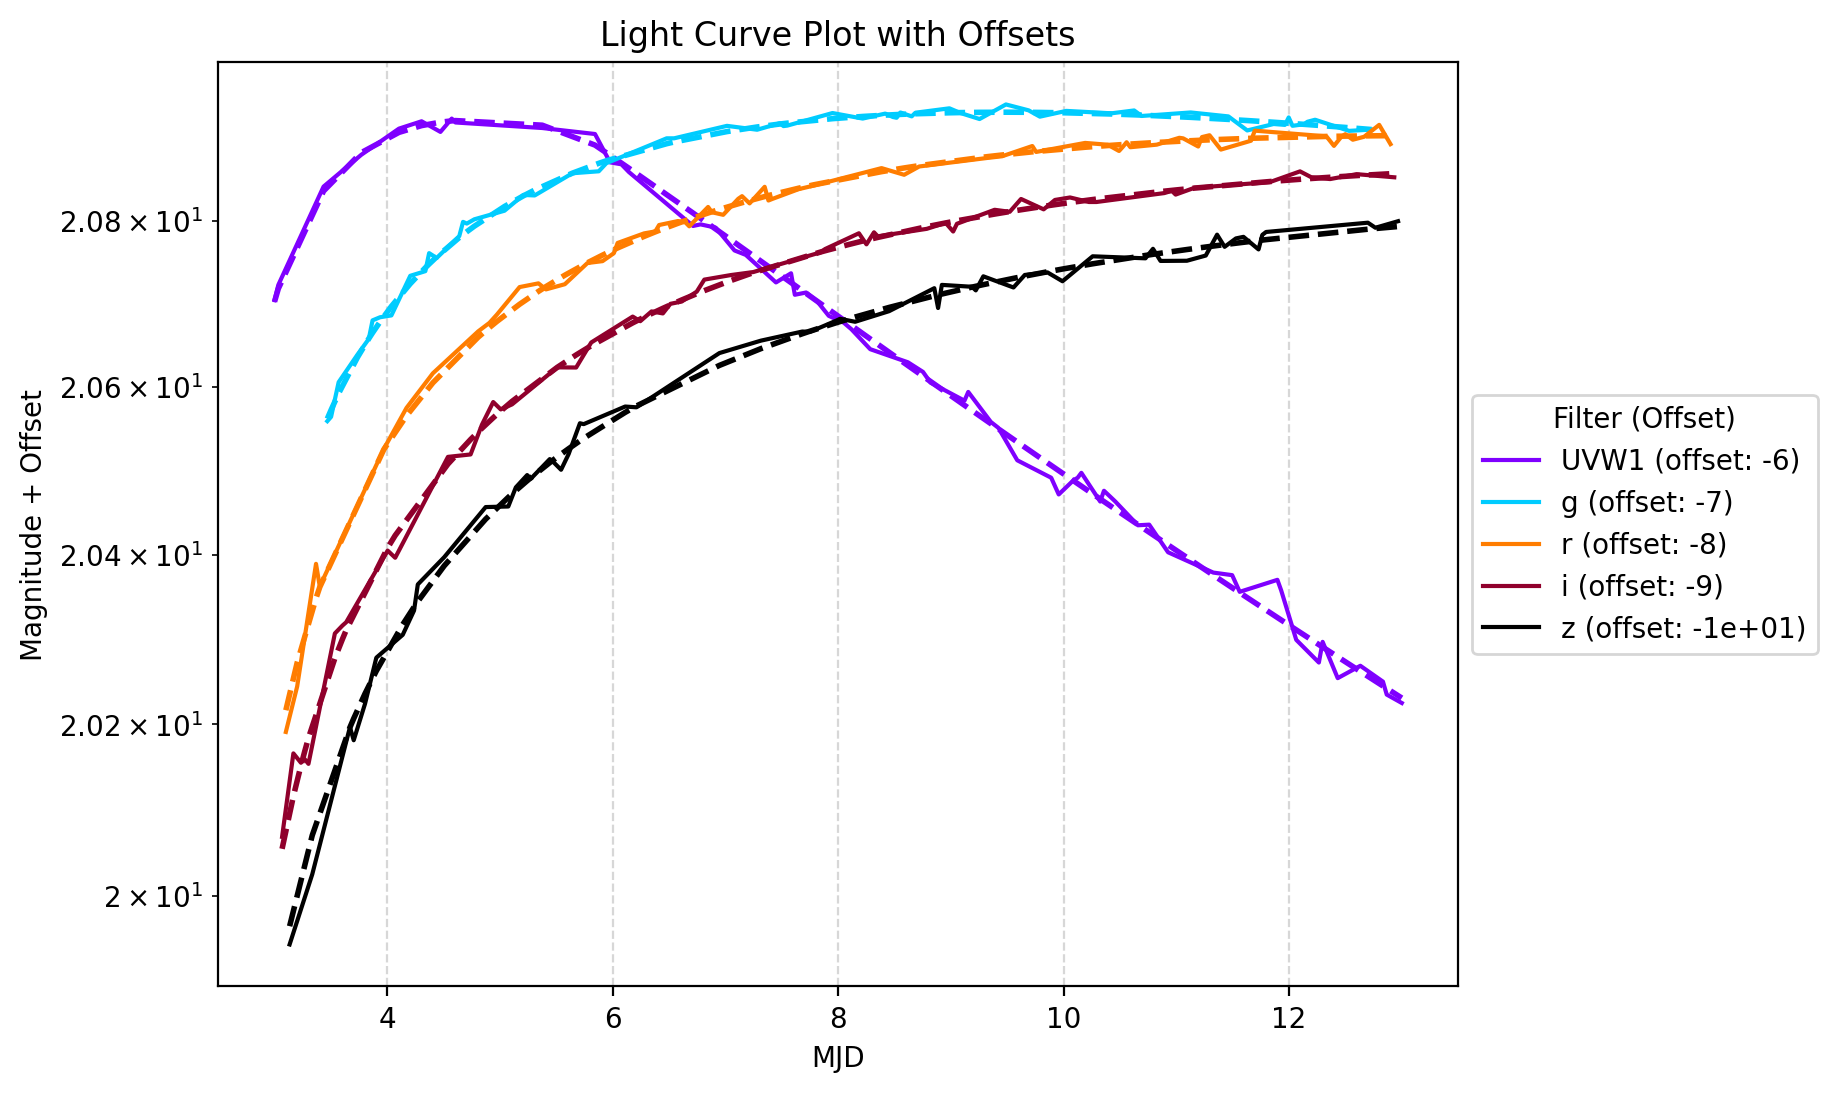

In [179]:
import numpy as np
import matplotlib.pyplot as ax

def light_curve_plot(lc, offset=0.5, pilcas=None, ufilters=None):
    """
    Plots light curves with different markers, applying an offset for each filter.
    
    Parameters:
    lc : dict or structured array
        A dataset containing 'MJD', 'mag', 'dmag', and 'filter' fields.
    """

    # Unique filters in the dataset
    ufilts = ufilters#np.unique(lc['filter'])

    # Define marker styles for each filter
    markers = ['o', 's', 'D', '^', 'v', 'P', '*', 'X']
    face_color = []
    
    # Define offsets for each filter (spaced by 0.5 mag)
    offsets = {filt: -10 + i * offset for i, filt in enumerate(ufilts[::-1])}

    fig, ax = plt.subplots(figsize=(8, 6), dpi=200)  # Set figure size

    for i, filt in enumerate(ufilts):
        # Create mask for the current filter
        fmask = np.array(lc['filter'] == filt)
        
        # Extract values and apply offset
        mjd_filt = lc['MJD'][fmask]
        y_filt = lc['lum'][fmask] + offsets[filt]  # Apply offset
        y_filt_err = lc['dlum'][fmask]
        if pilcas:
            y_pilca = pilcas[i]
        # Select marker style based on index
        marker = markers[i % len(markers)]
        
        style = filt.plotstyle

        # Plot with error bars
        # ax.errorbar(mjd_filt, y_filt, yerr=y_filt_err,
        #  fmt=marker, label=f"{filt} (offset: {offsets[filt]:.1g})",
        #  capsize=3, **style)
        ax.plot(mjd_filt, np.log10(y_filt), 
         ls="-", label=f"{filt} (offset: {offsets[filt]:.1g})", **style)
        # print(filt)
        # aaa
        ax.plot(mjd_filt, torch.log10(y_pilca), c=style["mfc"], lw=2, ls="--")

    # Aesthetics
    ax.set_xlabel("MJD")
    ax.set_ylabel("Magnitude + Offset")
    # ax.invert_yaxis()  # Invert y-axis for magnitudes
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title("Light Curve Plot with Offsets")
    ax.set_yscale("log")
    # Move the legend to the right of the plot
    ax.legend(title="Filter (Offset)", loc='center left', bbox_to_anchor=(1, 0.5))

        
# light_curve_plot(lc)
light_curve_plot(lc, offset = 1, pilcas=pilcas, ufilters=np.unique(filter_for_mjd))

In [222]:
import torch.nn as nn

class SC4Loss(nn.Module):
    def __init__(self, sc4model, ufilters):
        """
        Custom Weighted Mean Squared Error Loss
        :param weight: A tensor of weights for each sample (optional).
        """
        super(SC4Loss, self).__init__()
        self.sc4model = sc4model
        self.ufilters = ufilters
        # self.weight = weight

    def forward(self, outputs, targets, filters_mask):
        """
        Compute the weighted MSE loss.
        :param predictions: Model outputs (torch tensor).
        :param targets: Ground truth values (torch tensor).
        :return: Weighted MSE loss value.
        """
        v_s = outputs[0]       # Shock velocity
        M_env = outputs[1]     # Envelope mass
        f_rho_M = outputs[2]   # Density profile factor
        R = outputs[3]         # Radius
        t_exp = outputs[4] 
        t_exp = torch.clip(t_exp, max=2.9999)
        # sigma = outputs[5] 
        loss = 0
        for i, f in enumerate(self.ufilters):
            # print(f)
            lum = self.sc4model(targets[:,0][filters_mask[i]], v_s=v_s, M_env=M_env, f_rho_M=f_rho_M, R=R, t_exp=t_exp, f=f)
            # print(lum)
            # print(lum)
            # aa

            y_fit = lum#torch.log10(lum)
            y = 10**(targets[:,1][filters_mask[i]])
            # print(y[6], y_fit[6])
            # a
            # print((y-y_fit)**2/targets[:,2][filters_mask[i]]**2)
            # print(targets[:,2][filters_mask[i]])
            # print(y-y_fit)
            # aa
            loss += (torch.sum((y-y_fit)**2/targets[:,2][filters_mask[i]]**2))

        return loss.mean()

In [220]:
import torch
import torch.nn as nn
import torch.optim as optim
import nflows.transforms as transforms
import nflows.distributions as distributions
import nflows.flows as flows

param_dim = 5
k_layers = 3
base_distribution = distributions.StandardNormal(shape=[param_dim])
transform_list = []
for _ in range(k_layers):
    
    transform_list.append(transforms.MaskedAffineAutoregressiveTransform(features=param_dim, hidden_features=10))
# transform_list.append(SoftplusTransform())

transform = transforms.CompositeTransform(transform_list)
model = flows.Flow(transform, base_distribution)



In [228]:
import torchphysics as tp
importlib.reload(tp)

# model_inputs_torch = torch.tensor([7.2, 5, 1.6, 410, 2.5])/units_array
lr=1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
sc4model = tp.ShockCooling4(z=lc.meta["redshift"])
criterion = SC4Loss(sc4model, ufilters=ufilters)
epochs = 100
n_samples_loss = 10
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model.sample(1)
    outputs = nn.functional.softplus(outputs).to(torch.float64)#model_inputs_torch#torch.clamp(outputs, 1)
    
    
    loss = criterion(outputs.squeeze(), X_DATA, filters_mask)/n_samples_loss
    for i in range(n_samples_loss-1):
        outputs = model.sample(1)
        outputs = nn.functional.softplus(outputs).to(torch.float64)#model_inputs_torch#torch.clamp(outputs, 1)
        loss += criterion(outputs.squeeze(), X_DATA, filters_mask)/n_samples_loss

    loss.backward()
    optimizer.step()
    if epoch % 1 == 0:
        print(outputs)
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")


tensor([[7.1992e-02, 7.1156e+00, 4.9378e+00, 4.9879e-02, 1.8289e-03]],
       dtype=torch.float64, grad_fn=<ToCopyBackward0>)
Epoch 0: Loss = 7834260.7994
tensor([[5.8364e-01, 1.3196e+00, 1.1585e+00, 4.4515e-05, 3.2543e+00]],
       dtype=torch.float64, grad_fn=<ToCopyBackward0>)
Epoch 1: Loss = 5257106.7216
tensor([[1.1722, 2.6486, 7.9484, 0.5650, 0.1214]], dtype=torch.float64,
       grad_fn=<ToCopyBackward0>)
Epoch 2: Loss = 4925900.9485
tensor([[0.7298, 3.6116, 2.8083, 0.7466, 5.6775]], dtype=torch.float64,
       grad_fn=<ToCopyBackward0>)
Epoch 3: Loss = 16776971.3603
tensor([[0.6489, 0.2719, 4.4628, 6.1363, 0.9096]], dtype=torch.float64,
       grad_fn=<ToCopyBackward0>)
Epoch 4: Loss = 4244253.3040
tensor([[0.8143, 0.0845, 0.1618, 1.7110, 2.4235]], dtype=torch.float64,
       grad_fn=<ToCopyBackward0>)
Epoch 5: Loss = 5354317.3855
tensor([[5.8747e-03, 6.7103e-01, 6.9847e-03, 7.8896e-03, 3.0267e+01]],
       dtype=torch.float64, grad_fn=<ToCopyBackward0>)
Epoch 6: Loss = 5646265

In [ ]:
real_parameters = np.array([7.2, 5, 1.6, 410, 2.5])/units_array
real_parameters

array([2.27683992, 5.        , 1.6       , 2.85237234, 2.5       ])

In [ ]:
model_inputs_torch = torch.tensor([5.3875e+00, 4.1513e-07, 2.6636e+00, 1.7901e+00, 8.9253e-01])


v_s = model_inputs_torch[0]       # Shock velocity
M_env = model_inputs_torch[1]     # Envelope mass
f_rho_M = model_inputs_torch[2]   # Density profile factor
R = model_inputs_torch[3]         # Radius
t_exp = model_inputs_torch[4]     # explosion time
model = tp.ShockCooling4(z=lc.meta["redshift"])
for f in np.unique(filter_for_mjd):
    mask = filter_for_mjd == f
    y = model(MJD[mask], v_s=v_s, M_env=M_env, f_rho_M=f_rho_M, R=R, t_exp=t_exp, f=f)
    print(y)

tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64)
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64)
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, na

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import nflows.transforms as transforms
import nflows.distributions as distributions
import nflows.flows as flows

# Generate synthetic positive data
def generate_synthetic_data(n_samples=1000, dim=5):
    """Generates synthetic data with strictly positive values."""
    return torch.exp(torch.randn(n_samples, dim))  # Exponentiated normal for positivity

class SigmoidTransform(transforms.Transform):
    def __init__(self, lower_bound=1e-3, upper_bound=10.0):
        super().__init__()
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound

    def forward(self, inputs, context=None):
        """Transforms input to be within [lower_bound, upper_bound] using sigmoid scaling."""
        outputs = self.lower_bound + (self.upper_bound - self.lower_bound) * torch.sigmoid(inputs)
        logabsdet = torch.log((self.upper_bound - self.lower_bound) * torch.sigmoid(inputs) * (1 - torch.sigmoid(inputs)))
        return outputs, torch.sum(logabsdet, dim=-1)

    def inverse(self, inputs, context=None):
        """Inverse transform using logit scaling."""
        inputs = torch.clamp(inputs, self.lower_bound + 1e-6, self.upper_bound - 1e-6)  # Prevent log(0)
        outputs = torch.log((inputs - self.lower_bound) / (self.upper_bound - inputs))
        logabsdet = -torch.log((inputs - self.lower_bound) * (self.upper_bound - inputs))
        return outputs, torch.sum(logabsdet, dim=-1)#.sum(dim=-1, keepdim=True)


# Define a normalizing flow model with K transformation layers
def create_flow_model(k_layers=5, param_dim=5):
    base_distribution = distributions.StandardNormal(shape=[param_dim])
    transform_list = []
    for _ in range(k_layers):
        transform_list.append(transforms.MaskedAffineAutoregressiveTransform(features=param_dim, hidden_features=10))
    transform_list.append(SigmoidTransform())  # Ensure positive outputs
    
    transform = transforms.CompositeTransform(transform_list)
    return flows.Flow(transform, base_distribution)

# Custom loss function
def custom_loss_function(log_prob):
    return -log_prob.mean()

# Training function
def train_flow(model, data, epochs=1000, lr=1e-3):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        log_prob = model.log_prob(data)
        loss = custom_loss_function(log_prob)
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# Generate training data with 5 positive parameters
data = generate_synthetic_data(n_samples=1000, dim=5)

# Create and train the flow model with K layers
K = 5  # Number of transformation layers
param_dim = 5  # Number of output parameters
flow_model = create_flow_model(K, param_dim)
train_flow(flow_model, data)

# Sample from the trained model
N = 10  # Number of samples
samples = flow_model.sample(num_samples=1)
print("Generated Samples:", samples)


Epoch 0: Loss = 90.9142
Epoch 100: Loss = 29.6444
Epoch 200: Loss = 24.4131
Epoch 300: Loss = 21.9954
Epoch 400: Loss = 19.8965
Epoch 500: Loss = 18.2527


KeyboardInterrupt: 

In [ ]:
import torch
import normflows as nf

class ExpTransform(nf.transforms.Transform):
    """Elementwise exponential transform to ensure positive outputs."""
    def __init__(self):
        super().__init__()

    def forward(self, z):
        x = torch.exp(z)
        log_det = torch.sum(z, dim=1)  # log|det(Jacobian)| = sum(z)
        return x, log_det

    def inverse(self, x):
        z = torch.log(x)
        log_det = -torch.sum(z, dim=1)  # log|det(Jacobian)| = -sum(log(x))
        return z, log_det

# Define the dimensionality of your parameters
param_dim = 5

# Define the base distribution
base = nf.distributions.DiagGaussian(param_dim)

# Define the sequence of transformations
transforms = []
for _ in range(3):  # Number of layers
    transforms.append(nf.transforms.MaskedAffineAutoregressiveTransform(param_dim, param_dim))
transforms.append(ExpTransform())  # Ensure positivity

# Combine transformations into a normalizing flow model
flow = nf.NormalizingFlow(base, transforms)

# Sample from the model
samples = flow.sample(2)
print(samples)

AttributeError: module 'normflows.transforms' has no attribute 'Transform'

In [ ]:
torch.nn.functional.softplus(torch.tensor(-54.))

tensor(3.5326e-24)

In [ ]:
base_distribution.sample(489451).flatten()

tensor([0.9668, 0.1584, 1.2892,  ..., 0.2196, 0.6326, 0.3509])

(array([12., 23., 40., 29., 25.,  9.,  8.,  1.,  2.,  1.]),
 array([0.08203599, 0.25807101, 0.43410605, 0.61014104, 0.78617609,
        0.96221113, 1.13824618, 1.31428123, 1.49031615, 1.6663512 ,
        1.84238625]),
 <BarContainer object of 10 artists>)

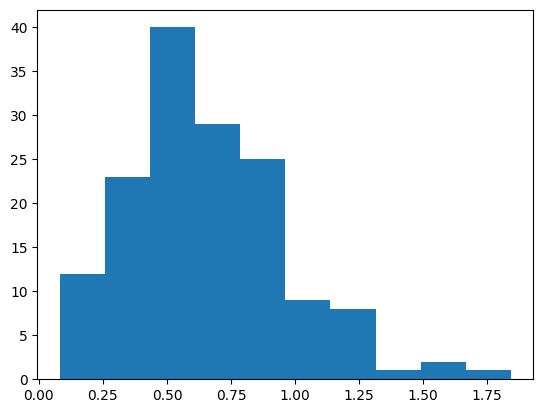

In [ ]:
plt.hist(torch.nn.functional.softplus(transforms.MaskedAffineAutoregressiveTransform(features=param_dim, hidden_features=10)(base_distribution.sample(30))[0].flatten()).detach().numpy())

In [ ]:

import torch
from nflows import transforms, distributions, flows


class SoftplusTransform(transforms.Transform):
    """Elementwise softplus transform to ensure positive outputs."""
    def forward(self, inputs, context=None):
        outputs = torch.nn.functional.softplus(inputs)
        logabsdet = torch.sum(torch.log1p(torch.exp(-inputs)), dim=-1)
        print(inputs)
        print("AAAA")
        return outputs, logabsdet

    def inverse(self, inputs, context=None):
        outputs = torch.log(torch.expm1(inputs))
        logabsdet = -torch.sum(torch.log1p(torch.exp(-outputs)), dim=-1)
        print(inputs)
        return outputs, logabsdet

# Define the dimensionality of your parameters
param_dim = 5

# Define the base distribution
base_distribution = distributions.StandardNormal(shape=[param_dim])

# Define the sequence of transformations
transform_list = []
for _ in range(2):  # Number of layers
    transform_list.append(transforms.MaskedAffineAutoregressiveTransform(features=param_dim, hidden_features=10))
# transform_list.append(SoftplusTransform())  # Ensure positivity

# Combine transformations into a composite transform
transform = transforms.CompositeTransform(transform_list)

# Create the flow model
model = flows.Flow(transform, base_distribution)

# Sample from the model
samples = model.sample(num_samples=1)
print(samples)

tensor([[-3.2473,  2.7183, -3.2162,  0.9288, -0.2016]], grad_fn=<DivBackward0>)


In [ ]:
import torch.nn as nn

class SC4Loss(nn.Module):
    def __init__(self, sc4model, ufilters):
        """
        Custom Weighted Mean Squared Error Loss
        :param weight: A tensor of weights for each sample (optional).
        """
        super(SC4Loss, self).__init__()
        self.sc4model = sc4model
        self.ufilters = ufilters
        # self.weight = weight

    def forward(self, outputs, targets, filters_mask):
        """
        Compute the weighted MSE loss.
        :param predictions: Model outputs (torch tensor).
        :param targets: Ground truth values (torch tensor).
        :return: Weighted MSE loss value.
        """
        v_s = outputs[0]       # Shock velocity
        M_env = outputs[1]     # Envelope mass
        f_rho_M = outputs[2]   # Density profile factor
        R = outputs[3]         # Radius
        t_exp = outputs[4] 
        # sigma = outputs[5] 
        loss = 0
        for i, f in enumerate(self.ufilters):
            print(f)
            lum = self.sc4model(targets[:,0][filters_mask[i]], v_s=v_s, M_env=M_env, f_rho_M=f_rho_M, R=R, t_exp=t_exp, f=f)
            # print(lum)
            # print(lum)
            # aa

            y_fit = torch.log10(lum)
            y = targets[:,1][filters_mask[i]]
            print(y[6], y_fit[6])
            # a
            loss += (torch.sum((y-y_fit)**2)/len(y_fit))

        return loss.mean()

In [ ]:
model = tp.ShockCooling4(z=lc.meta["redshift"])
loss = SC4Loss(sc4model=model, ufilters=ufilters)
loss(outputs=torch.tensor([7.2, 5, 1.6, 410, 2.5])/units_array, targets=X_DATA, filters_mask=filters_mask)

UVW1
tensor(20.1280, dtype=torch.float64) tensor(20.7023, dtype=torch.float64)
g
tensor(20.3986, dtype=torch.float64) tensor(20.3664, dtype=torch.float64)
r
tensor(20.1280, dtype=torch.float64) tensor(20.1497, dtype=torch.float64)
i
tensor(20.1280, dtype=torch.float64) tensor(20.0068, dtype=torch.float64)
z
tensor(20.1280, dtype=torch.float64) tensor(19.8724, dtype=torch.float64)


tensor(0.4507, dtype=torch.float64)